___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

2023-11-01 15:02:43.033795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (60000, 28, 28)
X_test Shape:  (10000, 28, 28)
y_train Shape:  (60000,)
y_test Shape:  (10000,)


In [4]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

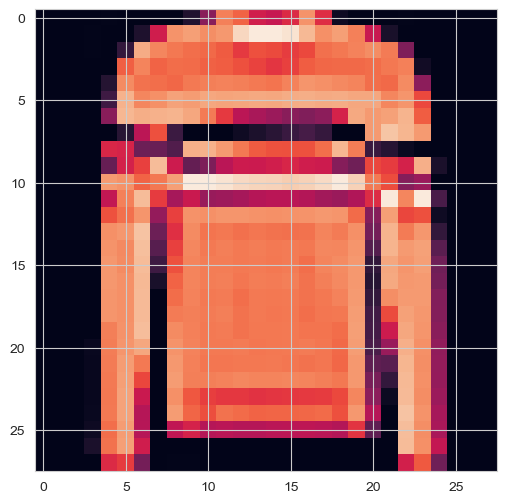

In [6]:
plt.imshow(X_train[5])
plt.show()

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
classes[y_train[0]]

'Ankle boot'

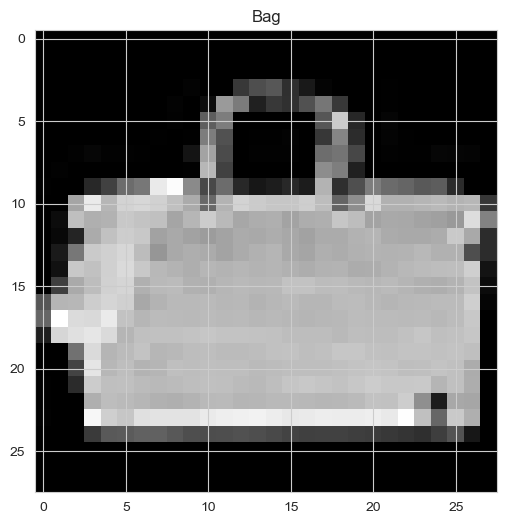

In [10]:
plt.imshow(X_train[99], cmap="gray")
plt.title(classes[y_train[99]])
plt.show()

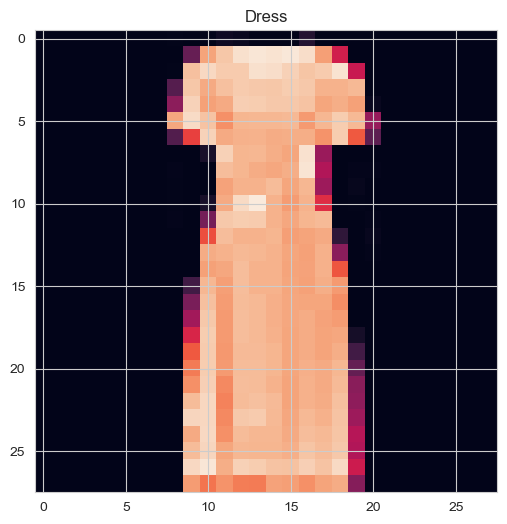

In [11]:
plt.imshow(X_train[50])
plt.title(classes[y_train[50]])
plt.show()

Text(0.5, 1.0, 'Sandal')

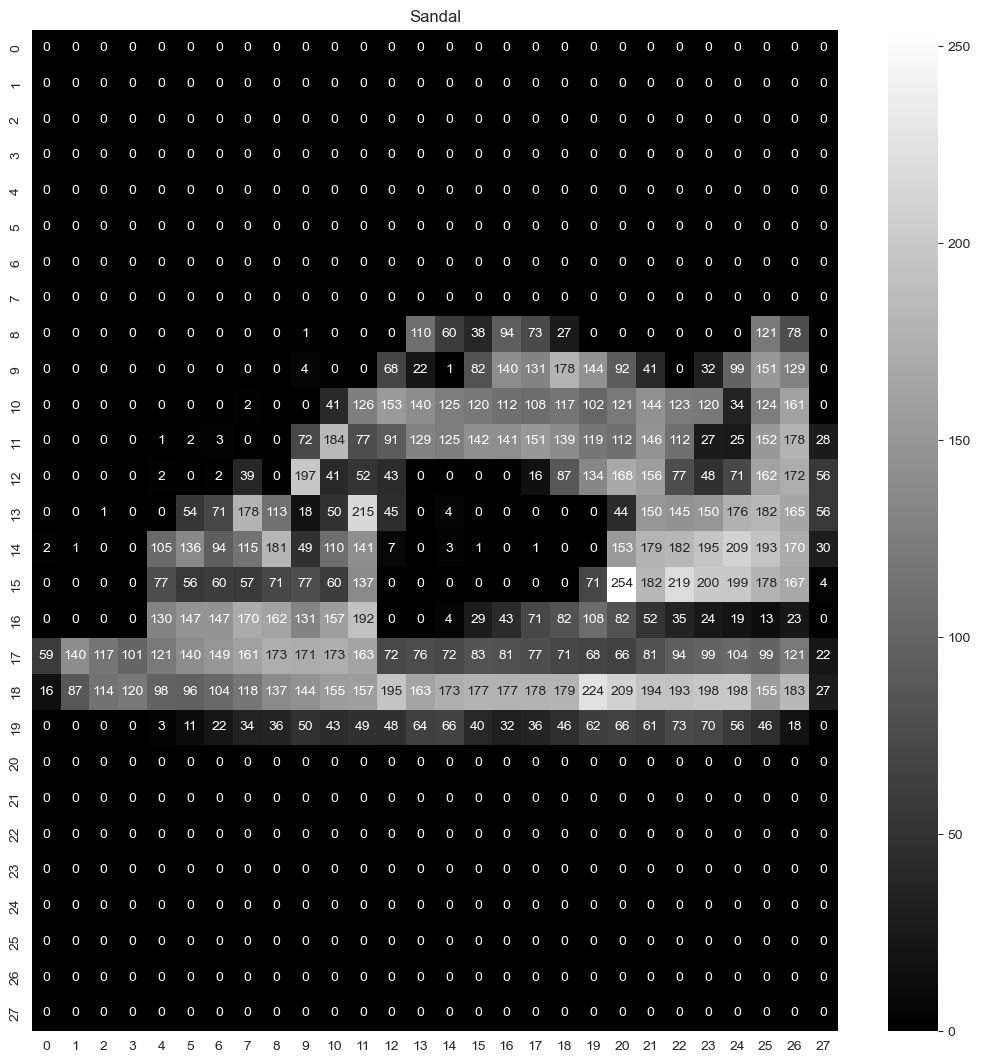

In [12]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[13], annot=True, cmap="gray", fmt=".3g")
plt.title(classes[y_train[13]])

Text(0.5, 1.0, 'Shirt')

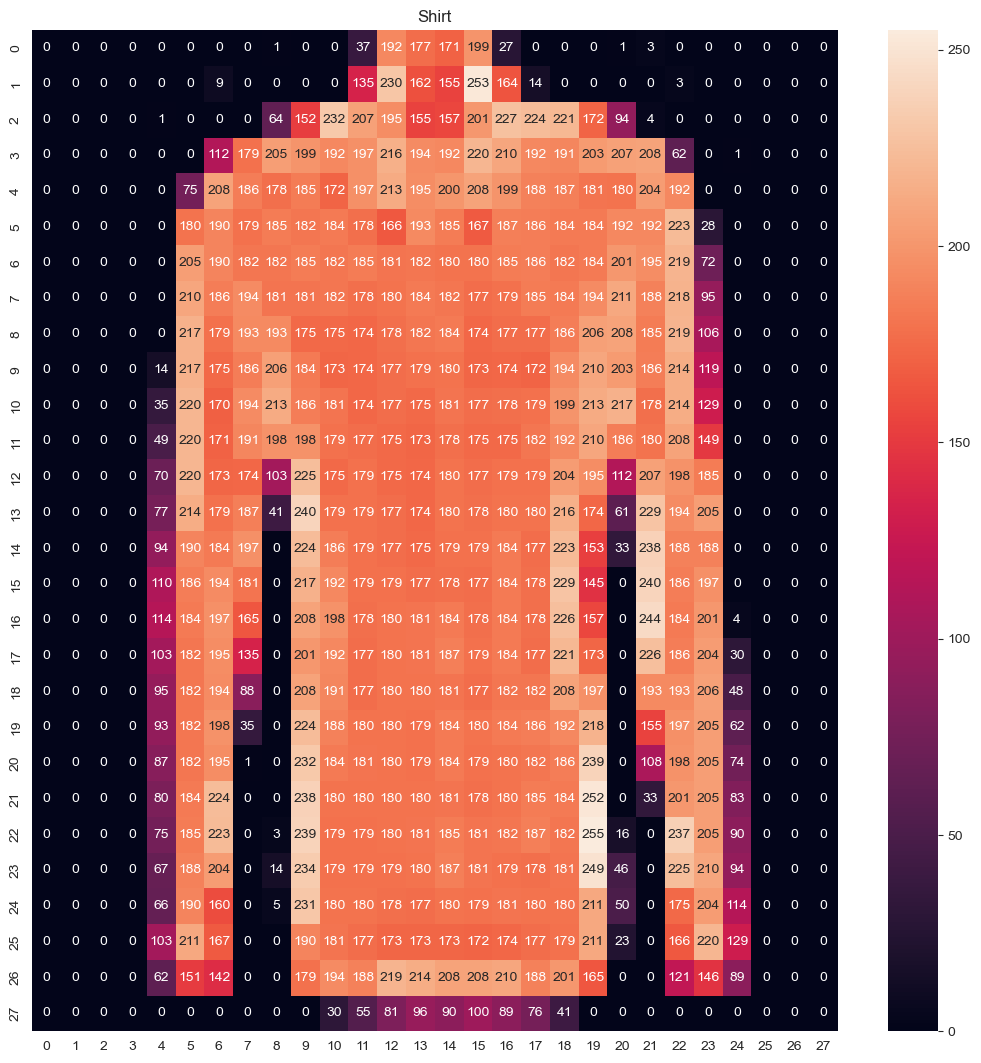

In [13]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[40], annot=True, fmt=".3g")
plt.title(classes[y_train[40]])

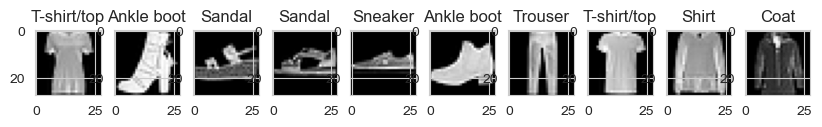

In [14]:
start , end = 10 , 20
for i in range(start, end):
    plt.subplot(1, end - start, i - start+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(classes[y_train[i]])

plt.show()

In [15]:
len(X_train[24999])

28

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_train[0]

9

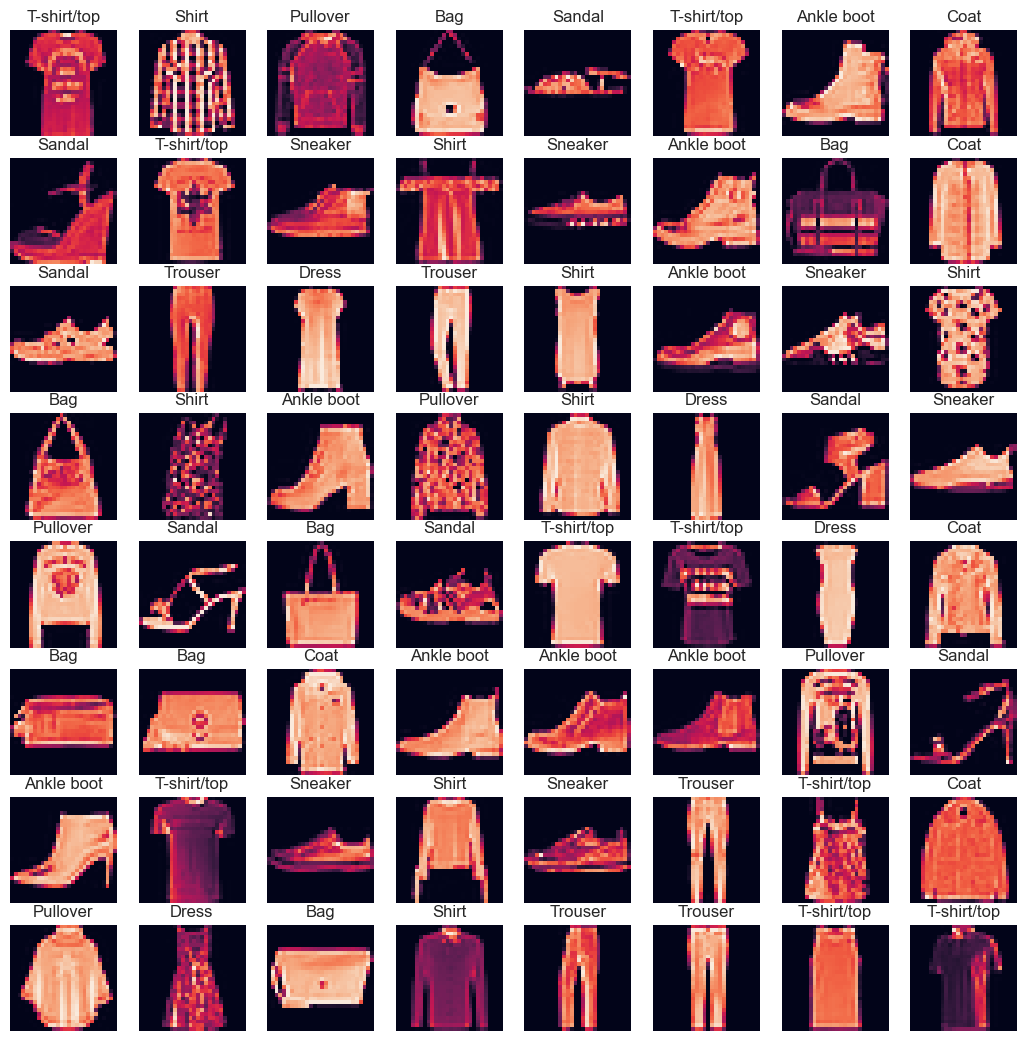

In [18]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

In [19]:
# f, axes = plt.subplots(2, 6, figsize=(12, 5))

# for ax in axes.ravel():
#     idx = np.random.randint(0, len(X_train))
#     ax.axis("off")
#     ax.set_title(y_train[idx])
#     ax.imshow(X_train[idx])
# plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
print("Max Values Train : ", X_train.max())
print("Min Values Train : ", X_train.min())

Max Values Train :  255
Min Values Train :  0


In [21]:
# Normalize image pixels
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [22]:
print("Max Values Train : ", X_train.max())
print("Min Values Train : ", X_train.min())

Max Values Train :  1.0
Min Values Train :  0.0


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)

X_train Shape:  (60000, 28, 28)
X_test Shape:  (10000, 28, 28)


In [24]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [25]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)

X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

y_train Shape:  (60000,)
y_test Shape:  (10000,)


In [28]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [29]:
print("y_train Shape: ",Y_train.shape)
print("y_test Shape: ",Y_test.shape)

y_train Shape:  (60000, 10)
y_test Shape:  (10000, 10)


Validation Data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=42, shuffle=True)

In [31]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_valid.shape)
print("y_train Shape: ",Y_train.shape)
print("y_test Shape: ",Y_valid.shape)

X_train Shape:  (48000, 28, 28, 1)
X_test Shape:  (12000, 28, 28, 1)
y_train Shape:  (48000, 10)
y_test Shape:  (12000, 10)


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [33]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [35]:
print(28 * ((3 * 3 * 1) + 1))

280


##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=4, restore_best_weights=True)

In [38]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stop],
)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4177 - accuracy: 0.8511 - val_loss: 0.3303 - val_accuracy: 0.8820
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2771 - accuracy: 0.9019 - val_loss: 0.2795 - val_accuracy: 0.9045
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2351 - accuracy: 0.9157 - val_loss: 0.2636 - val_accuracy: 0.9090
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2070 - accuracy: 0.9262 - val_loss: 0.2713 - val_accuracy: 0.9081
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1882 - accuracy: 0.9332 - val_loss: 0.2846 - val_accuracy: 0.9081
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1686 - accuracy: 0.9405 - val_loss: 0.2931 - val_accuracy: 0.9114
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1555 - accuracy: 0.9449 - val_loss: 0.2840 - val_accuracy:

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.418,0.851,0.330,0.882
1,0.277,0.902,0.280,0.905
2,0.235,0.916,0.264,0.909
3,0.207,0.926,0.271,0.908
4,0.188,0.933,0.285,0.908


In [40]:
print("X_train Shape: ",X_train.shape)
print("Y_train Shape: ",Y_train.shape)

X_train Shape:  (48000, 28, 28, 1)
Y_train Shape:  (48000, 10)


In [41]:
model.metrics_names

['loss', 'accuracy']

**TASK 7: Plot values of metrics you used in your model.**

<Axes: >

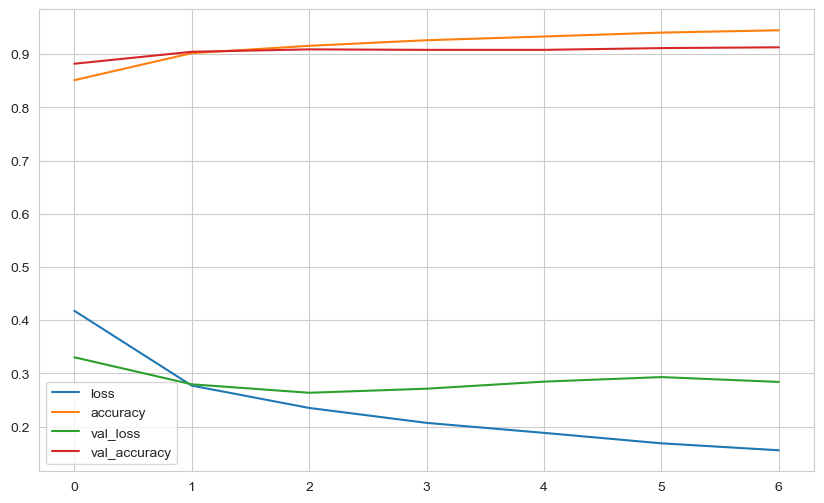

In [42]:
summary.plot()

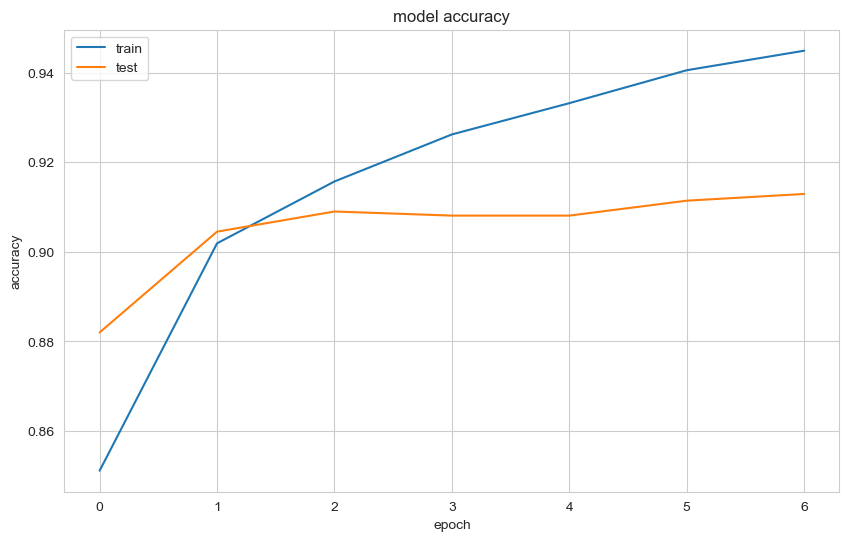

In [43]:
# summarize history for recall
plt.plot(summary['accuracy'])
plt.plot(summary['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

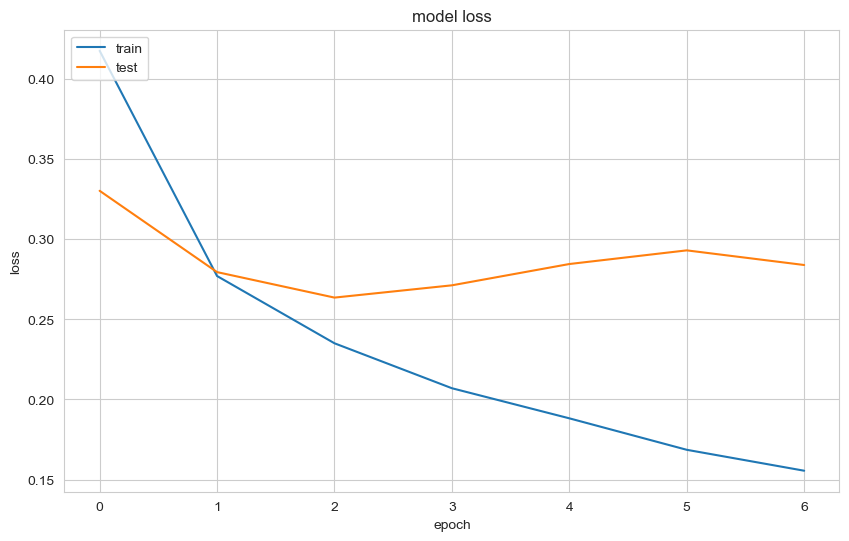

In [44]:
# summarize history for loss
plt.plot(summary['loss'])
plt.plot(summary['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [45]:
from sklearn.metrics import (classification_report,confusion_matrix,multilabel_confusion_matrix,)

In [46]:
loss, accuracy  = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

Test loss:  0.27488231658935547
Test accuracy:  0.9042999744415283


In [47]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.4864942e-05, 5.1775004e-07, 1.7554348e-05, ..., 1.2405063e-02,
        8.5379940e-04, 9.8484737e-01],
       [1.0507510e-05, 5.6233859e-13, 9.9997187e-01, ..., 1.5431410e-10,
        2.2227503e-10, 1.1999327e-10],
       [1.7144703e-08, 1.0000000e+00, 5.7111170e-11, ..., 1.6576158e-12,
        1.5155939e-12, 8.4707259e-14],
       ...,
       [1.3724690e-04, 2.0162012e-09, 2.9039309e-05, ..., 5.3451208e-07,
        9.9929845e-01, 1.1906063e-09],
       [7.5719830e-09, 9.9999964e-01, 9.0058838e-10, ..., 4.1332766e-12,
        5.8732038e-12, 1.6219652e-11],
       [1.7912973e-03, 1.0732803e-04, 3.6134815e-03, ..., 1.3382649e-01,
        7.9411447e-02, 4.2797336e-03]], dtype=float32)

In [48]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1000
           1       0.96      0.99      0.98      1000
           2       0.80      0.89      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.63      0.71      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [50]:
print(confusion_matrix(y_test, y_pred))

[[899   0  23  15   5   2  50   0   6   0]
 [  1 988   0   7   1   0   1   0   2   0]
 [ 15   4 885   5  47   0  44   0   0   0]
 [ 15  25  15 898  26   0  19   0   2   0]
 [  2   1  81  24 864   0  26   0   2   0]
 [  0   0   0   0   0 970   0  20   2   8]
 [147   3  93  30  86   0 632   0   9   0]
 [  0   0   0   0   0   4   0 986   1   9]
 [  2   3   3   1   2   1   4   3 981   0]
 [  0   0   0   0   1   7   1  51   0 940]]


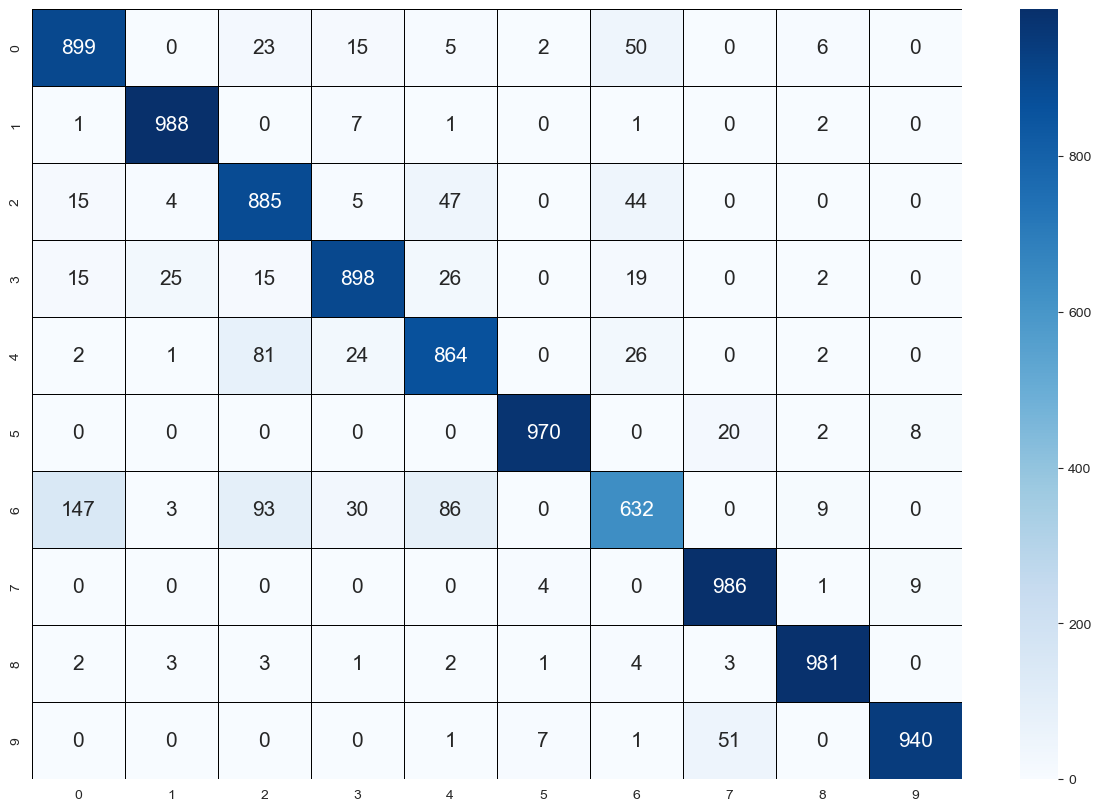

In [51]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

## Prediction

In [52]:
my_number = X_test[3]

In [53]:
my_number.shape

(28, 28, 1)

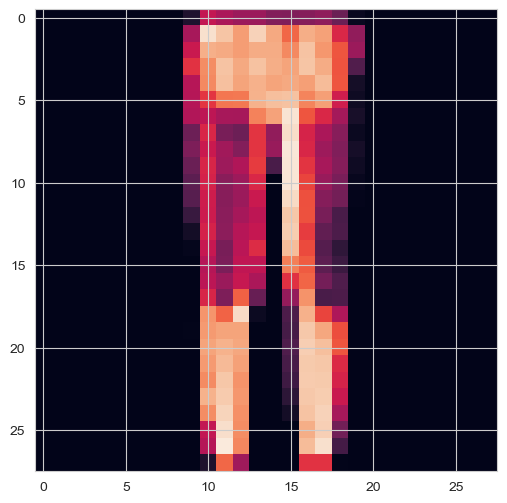

In [54]:
# plt.imshow(my_number, cmap="gray")
plt.imshow(my_number)
plt.show()

In [55]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [56]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob 

1/1 [==============================] - 0s 15ms/step


array([[1.0952346e-08, 9.9999976e-01, 3.2326064e-10, 7.4970004e-08,
        5.4461324e-08, 3.2715100e-10, 6.0727323e-10, 1.2445485e-11,
        2.7803495e-12, 4.5510644e-12]], dtype=float32)

In [57]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([1])

In [58]:
classes[int(y_pred)]

'Trouser'

In [59]:
model.save("cnn-1.h5")

## Load the Saved Model and Get Predictions

In [60]:
from tensorflow.keras.models import load_model

In [61]:
model = load_model("cnn-1.h5")

In [62]:
X_test[24].shape

(28, 28, 1)

In [63]:
np.expand_dims(X_test[24], axis=0).shape

(1, 28, 28, 1)

In [64]:
pred = model.predict(np.expand_dims(X_test[24], 0))

1/1 [==============================] - 0s 38ms/step


In [65]:
np.argmax(pred)

1

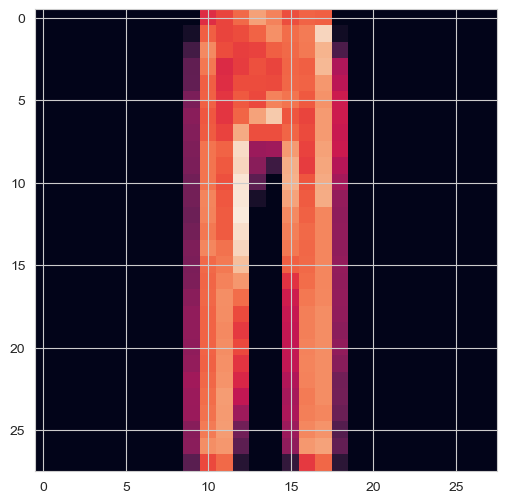

In [66]:
# plt.imshow(X_test[24].reshape(28, 28))
plt.imshow(X_test[24])
plt.show()

In [67]:
classes[8]

'Bag'

In [68]:
def plot_sample_with_prediction(model1, x_test, y_test, classes, sample_index):
    sample = x_test[sample_index]
    sample = np.expand_dims(sample, 0)
    pred_prob = model.predict(sample)
    y_pred = np.argmax(pred_prob)
    y_true = np.argmax(y_test[sample_index])

    # Plot the sample image
    plt.figure(figsize=(4, 4))
    plt.imshow(sample[0])
    plt.title(f'Actual: {classes[y_true]}\nPredicted: {classes[y_pred]}')
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 14ms/step


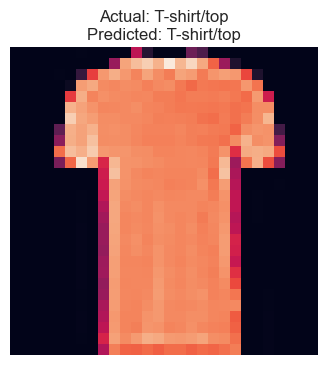

In [69]:
plot_sample_with_prediction(model, X_test, y_test, classes, 88)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___